<IPython.core.display.Javascript object>


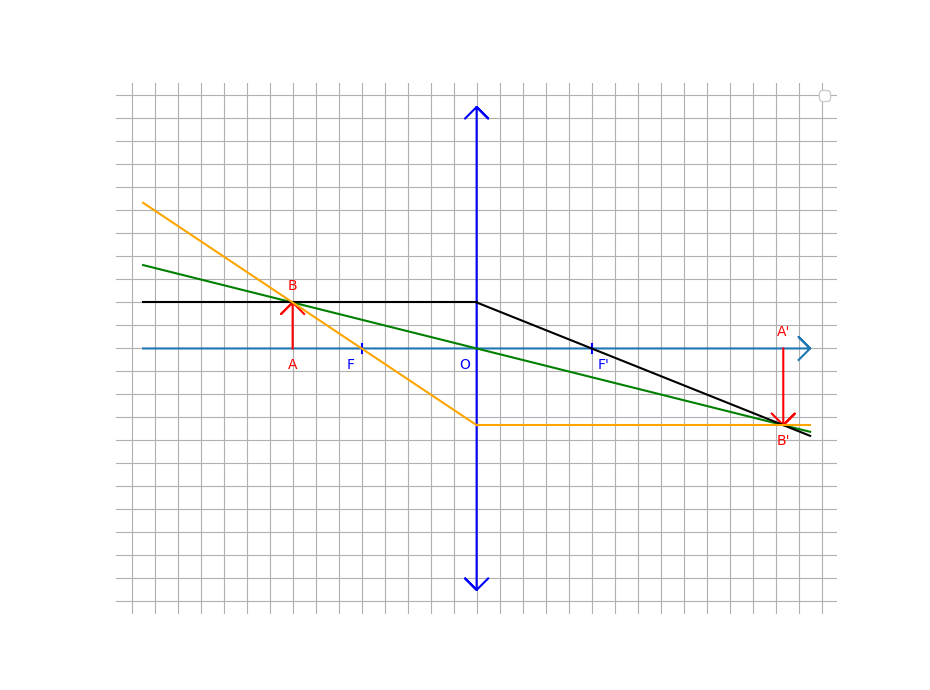

interactive(children=(FloatSlider(value=5.0, description='OFprim', max=10.0, min=-10.0, step=0.5), FloatSlider…

No handles with labels found to put in legend.


In [4]:
%matplotlib notebook
#En dynamique
from math import cos,pi,sin,atan2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact, widgets


def calculOAprim(OFprim,OA):
    if OFprim==0 or OA==0:
        return 0
    elif abs((1/OFprim + 1/OA))<1e-3:
        return 10000
    else:       
        return 1/(1/OFprim + 1/OA)

def calculAprimBprim(AB,OA,OAprim):
    if OAprim==10000 or OA==0 or AB==0 or OAprim==0:
        return 0
    else:
        return OAprim*AB/OA

fig = plt.figure(figsize=(9.3,6.9))
ax1 = fig.add_subplot(1,1,1)
fig.show()

@interact(OFprim=(-10,10,0.5),AB=(-5,5,0.5),OA=(-10,10,0.5),grid=True,Objet=True,Image=True,Lentille=True,Rayon1=["none","black","red","green","blue","pink","orange"],Rayon2=["none","black","red","green","blue","pink","orange"],Rayon3=["none","black","red","green","blue","pink","orange"])
def setparams(OFprim=5.,AB=2.,OA=-8.,grid=True,Objet=True,Image=True,Lentille=True,Rayon1="green",Rayon2="black",Rayon3="orange"):
    OAprim =calculOAprim(OFprim,OA)
    AprimBprim = calculAprimBprim(AB,OA,OAprim)
    ax1.clear()
    if Rayon1=="none":
        drawRayon1=False
        c1="k"
    else:
        drawRayon1=True
        c1=Rayon1
        
    if Rayon2=="none":
        drawRayon2=False
        c2="k"
    else:
        drawRayon2=True
        c2=Rayon2
        
    if Rayon3=="none":
        drawRayon3=False
        c3="k"
    else:
        drawRayon3=True
        c3=Rayon3
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['left'].set_color('none')
    ax1.spines['bottom'].set_color('none')
    ax1.spines['bottom'].set_position(('data',0))
    ax1.spines['left'].set_position(('data',0))
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    ax1.set_xlim([-15,15])
    ax1.set_ylim([-11,11])
    ax1.set_xticklabels([""]*31)
    ax1.set_yticklabels(['']*11)
    ax1.axis('equal')
    ax1.set_xticks([-15+i for i in range(31)])
    ax1.set_yticks([-11+i for i in range(23)])
    ax1.xaxis.set_tick_params(color='none') 
    ax1.yaxis.set_tick_params(color='none') 
    ax1.plot([-14.5,14.5,14,14.5,14],[0,0,0.5,0,-0.5])
    if Lentille:
        if OFprim>0:
            df = 0.5
            ax1.plot([-0.5,0,0.5,0,0,-0.5,0,0.5],[10,10.5,10,10.5,-10.5,-10,-10.5,-10],'blue')
        elif OFprim!=0:
            df = -0.5
            ax1.plot([-0.5,0,0.5,0,0,-0.5,0,0.5],[10.5,10,10.5,10,-10,-10.5,-10,-10.5],'blue')
        if OFprim!=0:
            ax1.text(-0.5,-0.7,s='O',color='blue', horizontalalignment='center', verticalalignment='center')
            ax1.text(-(OFprim+df),-0.7,s='F',color='blue', horizontalalignment='center', verticalalignment='center')
            ax1.plot([-OFprim,-OFprim],[0.2,-0.2],'blue')
            ax1.text(OFprim+df,-0.7,s="F'",color='blue', horizontalalignment='center', verticalalignment='center')
            ax1.plot([OFprim,OFprim],[0.2,-0.2],'blue')
    if Objet:
        if AB<0 and OA!=0:
            ax1.plot([OA,OA,OA+0.5,OA,OA-0.5],[0,AB,AB+0.5,AB,AB+0.5],'red')
            ax1.text(OA,AB-0.7,s="B",color='red', horizontalalignment='center', verticalalignment='center')
            ax1.text(OA,0.7,s="A",color='red', horizontalalignment='center', verticalalignment='center')
        elif OA!=0 and AB!=0:
            ax1.plot([OA,OA,OA-0.5,OA,OA+0.5],[0,AB,AB-0.5,AB,AB-0.5],'red')
            ax1.text(OA,AB+0.7,s="B",color='red', horizontalalignment='center', verticalalignment='center')
            ax1.text(OA,-0.7,s="A",color='red', horizontalalignment='center', verticalalignment='center')
    if Image and AprimBprim!=0 and -14.5<OAprim<14.5 and -10.5<AprimBprim<10.5:
        if AprimBprim<0:
            ax1.plot([OAprim,OAprim,OAprim+0.5,OAprim,OAprim-0.5],[0,AprimBprim,AprimBprim+0.5,AprimBprim,AprimBprim+0.5],'red')
            ax1.text(OAprim,AprimBprim-0.7,s="B'",color='red', horizontalalignment='center', verticalalignment='center')
            ax1.text(OAprim,0.7,s="A'",color='red', horizontalalignment='center', verticalalignment='center')
        else:
            ax1.plot([OAprim,OAprim,OAprim-0.5,OAprim,OAprim+0.5],[0,AprimBprim,AprimBprim-0.5,AprimBprim,AprimBprim-0.5],'red')
            ax1.text(OAprim,AprimBprim+0.7,s="B'",color='red', horizontalalignment='center', verticalalignment='center')
            ax1.text(OAprim,-0.7,s="A'",color='red', horizontalalignment='center', verticalalignment='center')
    if drawRayon1 and OFprim!=0 and OA!=0 and AB!=0 and OAprim!=0:
            if -10.5<14.5*AB/OA<10.5:
                ax1.plot([-14.5,14.5],[-14.5*AB/OA,14.5*AB/OA],c1)
            else:
                x = 10.5/abs(AB/OA)
                ax1.plot([-x,x],[-x*AB/OA,x*AB/OA],c1)
    if drawRayon2 and OFprim!=0 and OA!=0 and AB!=0 and OAprim!=0:
            
            ax1.plot([-14.5,0],[AB,AB],c2)
            if OA>0:
                ax1.plot([OA,0],[AB,AB],'--',color=c2)
            if -10.5<AB-14.5*AB/OFprim<10.5:
                ax1.plot([0,14.5],[AB,AB-14.5*AB/OFprim],c2)
            else:
                x = (10.5+abs(AB))/abs(AB/OFprim)
                ax1.plot([0,x],[AB,AB-x*AB/OFprim],c2)
            if OAprim<-14.5 or abs(AprimBprim)>10.5:
                pente = (AprimBprim-AB)/OAprim
                if -10.5<AB-14.5*pente<10.5:
                    ax1.plot([-14.5,0],[AB-14.5*pente,AB],'--',color=c2)
                else:
                    x= (10.5-abs(AB))/abs(pente)
                    ax1.plot([-x,0],[AB-x*pente,AB],'--',color=c2)
            elif OAprim<0:
                ax1.plot([0,OAprim],[AB,AprimBprim],'--',color=c2)
    if drawRayon3 and OFprim!=0 and OA!=0 and AB!=0 and OAprim!=0:
            pente = AprimBprim/(OFprim)
            if abs(OFprim*pente)<10.5:
                ax1.plot([0,14.5],[OFprim*pente,OFprim*pente],c3)
                if OAprim<-14.5:
                    ax1.plot([-14.5,0],[OFprim*pente,OFprim*pente],'--',color=c3)
                elif OAprim<0:
                    ax1.plot([OAprim,0],[OFprim*pente,OFprim*pente],'--',color=c3)
           
            if OA>0:
                ax1.plot([0,OA],[OFprim*pente,AB],'--',color=c3)
            if OFprim>0:
                if -10.5<AprimBprim-14.5*pente<10.5:
                    xi = -14.5
                else:
                    xi = - abs((abs(AprimBprim)+10.5)/pente)
                yi = AprimBprim+xi*pente
                if abs(OFprim*pente)<10.5:
                    xf = 0
                    yf =OFprim*pente
                else:
                    xf = -OFprim+abs(10.5/pente)
                    yf = (xf+OFprim)*pente
                ax1.plot([xi,xf],[yi,yf],c3)
            else:
                pente = AprimBprim/(-OFprim)
                #pointillé après O
                ax1.plot([0,-OFprim],[AprimBprim,0],"--",color=c3)
                if -10.5<AprimBprim-14.5*pente<10.5:
                    ax1.plot([-14.5,0],[AprimBprim+14.5*pente,AprimBprim],c3)
                
                
                
           
    
    if grid: ax1.grid()
   # ax1.plot(t,x1,"blue",label="$s_1(t)\ =\ {}\ \cos(2\ \pi\ f\ t)$".format(A))
   # ax1.plot(t,x2,"red",label="$s_2(t)\ =\ {}\ \cos(2\ \pi\ f\ t\ {})$".format(B,dep))
   # ax1.plot(t,xsomme,"green",label="$A\cos(2\ \pi\ f\ t)+B\cos(2\ \pi\ f\ t\ +\phi)$\n"+rq)
    ax1.legend(loc="upper right",framealpha=1.)

    
  
setparams()

    
